# GRIP:Spark Foundation

# Author:Aswani Gumpena

# problem statement:● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’,As a business manager, try to find out the weak areas where you can work to make more profit. 


In [63]:
import pandas as pd

In [64]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [65]:
df=pd.read_csv('SampleSuperstore.csv')

In [66]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [67]:
df.shape

(9994, 13)

In [126]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [127]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [69]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [71]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

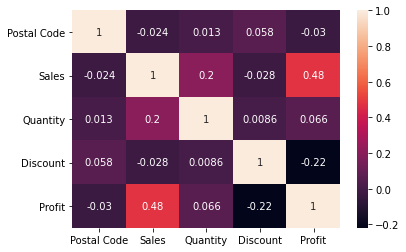

In [73]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

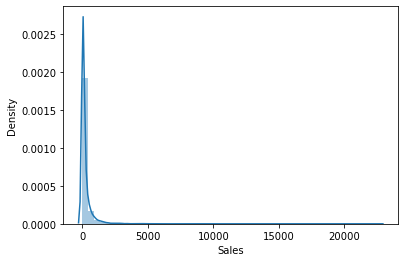

In [74]:
sns.distplot(df['Sales'])

(array([9.876e+03, 9.100e+01, 1.300e+01, 6.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 2.26424760e+03, 4.52805120e+03, 6.79185480e+03,
        9.05565840e+03, 1.13194620e+04, 1.35832656e+04, 1.58470692e+04,
        1.81108728e+04, 2.03746764e+04, 2.26384800e+04]),
 <BarContainer object of 10 artists>)

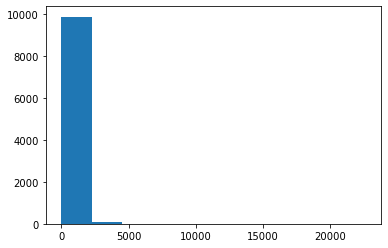

In [76]:
plt.hist(df['Sales'])

In [77]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [78]:
%matplotlib inline

<AxesSubplot:ylabel='Region'>

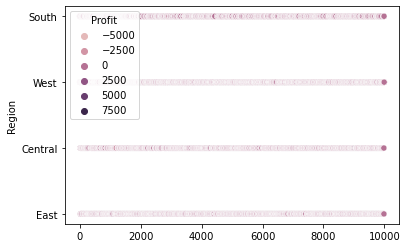

In [79]:
#sns.scatterplot(x=df.index,y=df['Region'],hue=df['Profit'])

<AxesSubplot:ylabel='Category'>

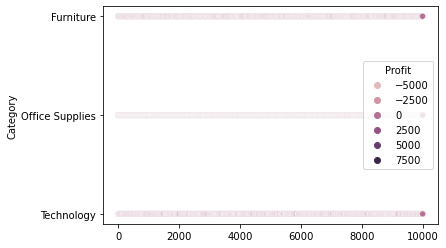

In [81]:
sns.scatterplot(x=df.index,y=df['Category'],hue=df['Profit'])

<AxesSubplot:xlabel='Category', ylabel='Count'>

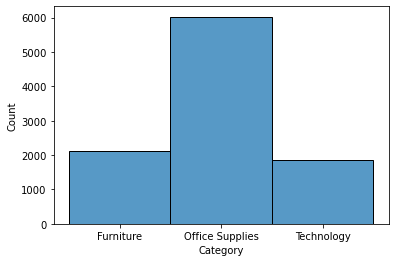

In [82]:
sns.histplot(df['Category'])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

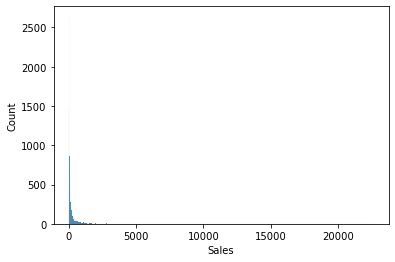

In [83]:
sns.histplot(df['Sales'])

Text(0, 0.5, 'Profit')

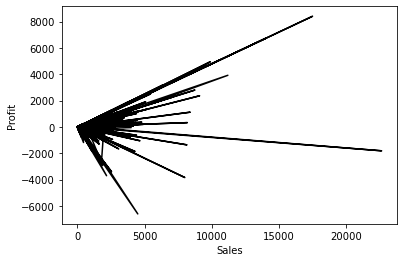

In [84]:
plt.plot(df['Sales'],df['Profit'],Color='Black')
plt.xlabel('Sales')
plt.ylabel('Profit')
  


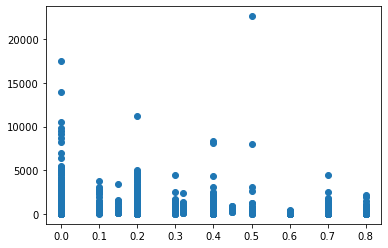

In [86]:
plt.scatter(df['Discount'],df['Sales'])

In [87]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le=LabelEncoder()

In [90]:
#df['Category']=le.fit_transform(df['Category'])

In [91]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [92]:
df['Sales'].value_counts()

12.960     56
15.552     39
19.440     39
10.368     36
25.920     36
           ..
598.458     1
8.559       1
831.200     1
45.056      1
37.008      1
Name: Sales, Length: 5825, dtype: int64

In [93]:
df['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

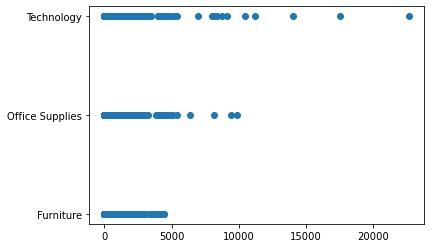

In [94]:
plt.scatter(df['Sales'],df['Category'])

In [95]:
df['Profit'].value_counts()

0.0000     65
6.2208     43
9.3312     38
5.4432     32
3.6288     32
           ..
23.5764     1
14.2020     1
10.9602     1
29.7024     1
16.9975     1
Name: Profit, Length: 7287, dtype: int64

2nd category can have high profit,high sales compared to 0 and 1 category

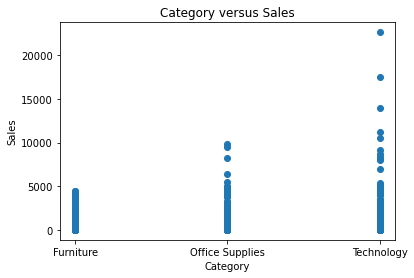

In [119]:
plt.scatter(df['Category'],df['Sales'])
plt.title('Category versus Sales')  
plt.xlabel('Category')  
plt.ylabel('Sales')  
plt.show()

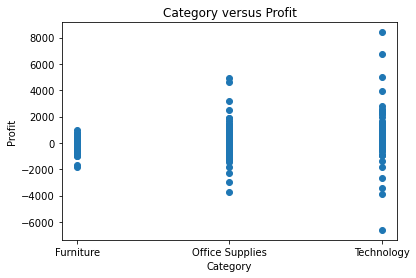

In [118]:
plt.scatter(df['Category'],df['Profit'])
plt.title('Category versus Profit')  
plt.xlabel('Category')  
plt.ylabel('Profit')  
plt.show()

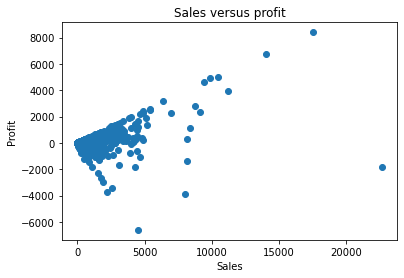

In [117]:
plt.scatter(df['Sales'],df['Profit'])
plt.title('Sales versus profit')  
plt.xlabel('Sales')  
plt.ylabel('Profit')  
plt.show()

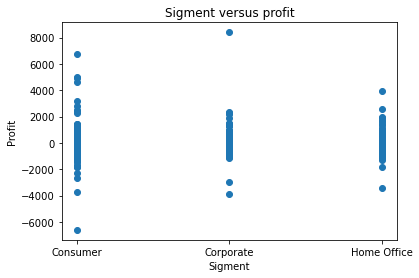

In [128]:
plt.scatter(df['Segment'],df['Profit'])
plt.title('Sigment versus profit')  
plt.xlabel('Sigment')  
plt.ylabel('Profit')  
plt.show()

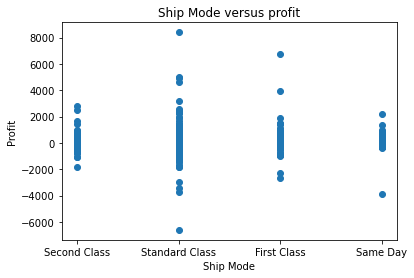

In [129]:
plt.scatter(df['Ship Mode'],df['Profit'])
plt.title('Ship Mode versus profit')  
plt.xlabel('Ship Mode')  
plt.ylabel('Profit')  
plt.show()

In [97]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [98]:
df['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

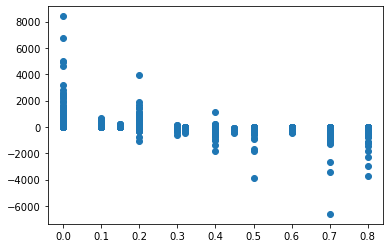

In [99]:
plt.scatter(df['Discount'],df['Profit'])

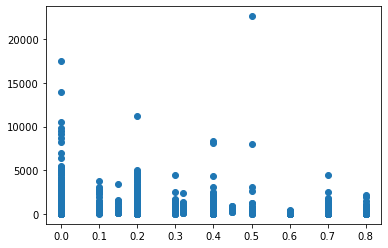

In [100]:
plt.scatter(df['Discount'],df['Sales'])

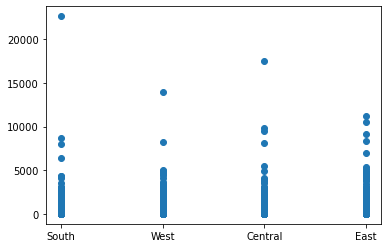

In [101]:
plt.scatter(df['Region'],df['Sales'])

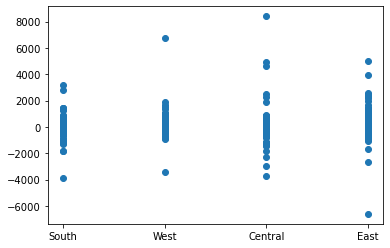

In [102]:
plt.scatter(df['Region'],df['Profit'])

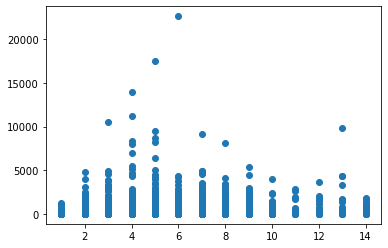

In [103]:
plt.scatter(df['Quantity'],df['Sales'])

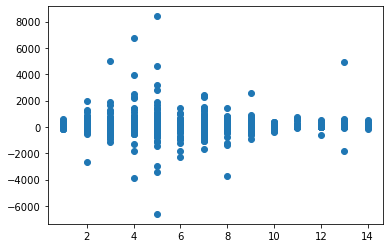

In [104]:
plt.scatter(df['Quantity'],df['Profit'])

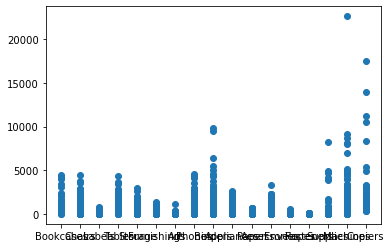

In [105]:
plt.scatter(df['Sub-Category'],df['Sales'])

<AxesSubplot:xlabel='Category', ylabel='Sales'>

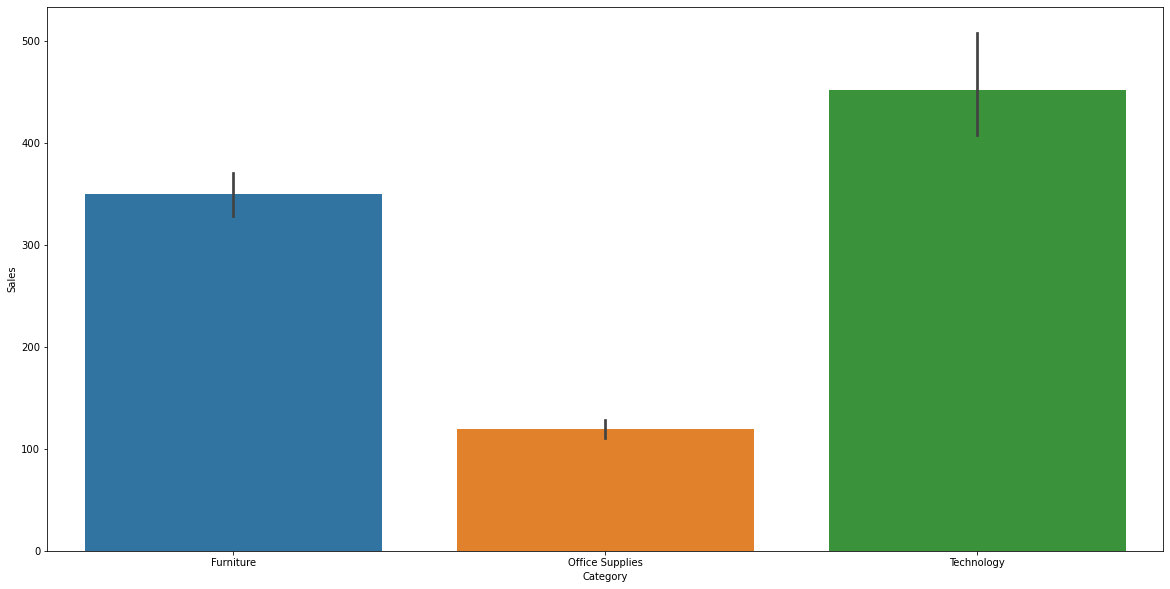

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(df['Category'],df['Sales'])

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

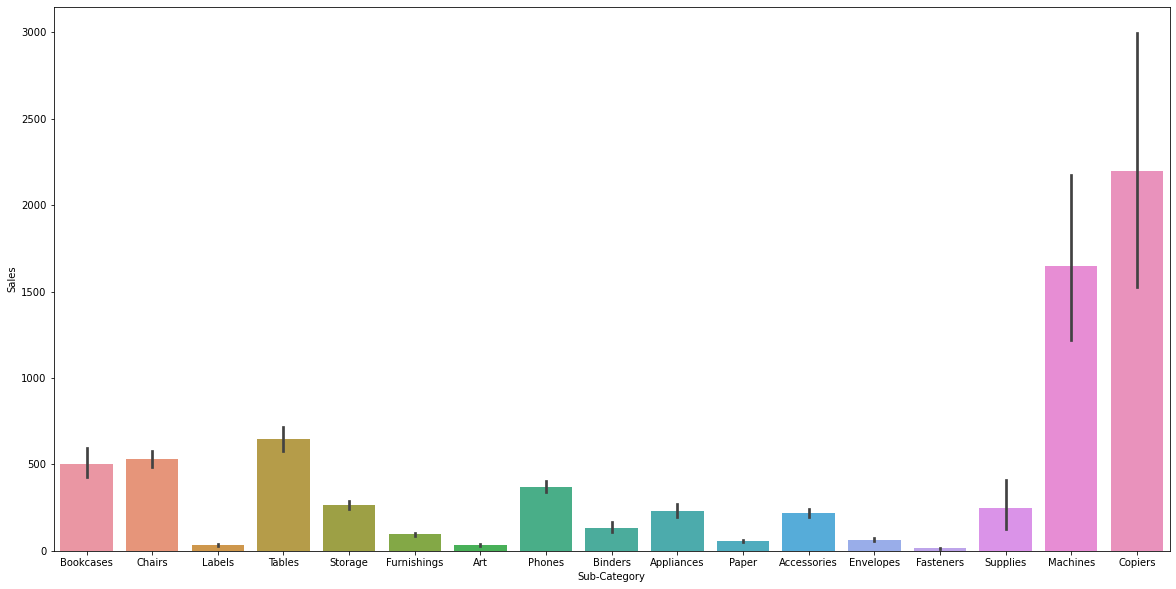

In [107]:
plt.figure(figsize=(20,10))
sns.barplot(df['Sub-Category'],df['Sales'])

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

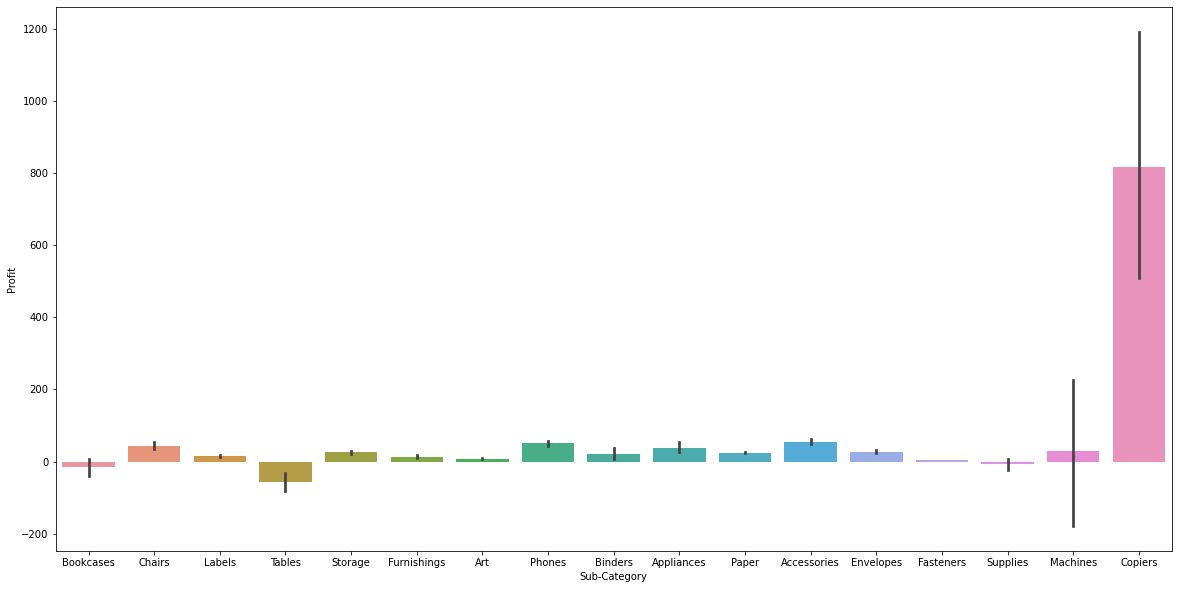

In [108]:
plt.figure(figsize=(20,10))
sns.barplot(df['Sub-Category'],df['Profit'])

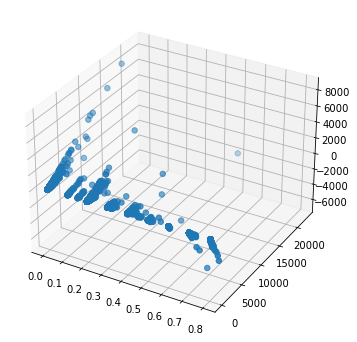

In [110]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Discount'],df['Sales'],df['Profit'],s=30)
plt.show()

In [121]:
from sklearn.preprocessing import LabelEncoder

In [125]:
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])
df['Region'].value_counts()


3    3203
1    2848
0    2323
2    1620
Name: Region, dtype: int64

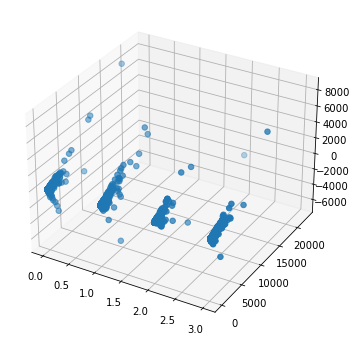

In [124]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Region'],df['Sales'],df['Profit'],s=30)
plt.show()